In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft, arange
from scipy.io import wavfile
import soundfile as sf
import sounddevice as sd
from scipy.signal import hilbert, chirp
from pydub import AudioSegment
from pydub.playback import play
import os

def frequency_sepectrum(x, sf):
    """
    Derive frequency spectrum of a signal from time domain
    :param x: signal in the time domain
    :param sf: sampling frequency
    :returns frequencies and their content distribution
    """
    x = x - np.average(x)  # zero-centering

    n = len(x)
    k = arange(n)
    tarr = n / float(sf)
    frqarr = k / float(tarr)  # two sides frequency range

    frqarr = frqarr[range(n // 2)]  # one side frequency range

    x = fft(x) / n  # fft computing and normalization
    x = x[range(n // 2)]

    return frqarr, abs(x)


def time_freq_domain(sr, audio_signal, Signal_Name):
    t = np.arange(0, len(audio_signal)/sr , 1/sr)
    
    plt.figure()
    plt.subplot(2, 1, 1)
    plt.plot(t, audio_signal)
    plt.xlabel('t')
    plt.ylabel(Signal_Name)

    frq, X = frequency_sepectrum(audio_signal, sr)

    neg_arr = -1 * frq
    frq = np.append(neg_arr[::-1], frq )
    frq = frq[frq.shape[0]//4:(3*frq.shape[0])//4]
    X = np.append(X[::-1], X )
    X = X[X.shape[0]//4:(3*X.shape[0])//4]

    plt.subplot(2, 1, 2)
    plt.plot(frq,  X, 'b')
    plt.xlabel('Freq (Hz)')
    plt.ylabel('|X(freq)|')
    plt.tight_layout()

    
def modulation(audio_message, sr):
    min_Peak = np.min(audio_message)
    modulation_index = 0.9
    Ac = abs(min_Peak) / modulation_index
    fc = 100 * 1000
    t = np.arange(0, len(audio_message)/sr , 1/sr)
    carrier = np.cos(2 * np.pi * fc * t)     
    modulated_signal = (Ac + audio_message) * carrier
    time_freq_domain(sr, modulated_signal, "Modulated Singal")
    return modulated_signal

def demodulation(modulated_signal, sr):
    envelop_detected = abs(hilbert(modulated_signal))
    demodulated_signal = envelop_detected - np.mean(envelop_detected) 
    time_freq_domain(sr, demodulated_signal, "DeModulated Signal")
    return demodulated_signal


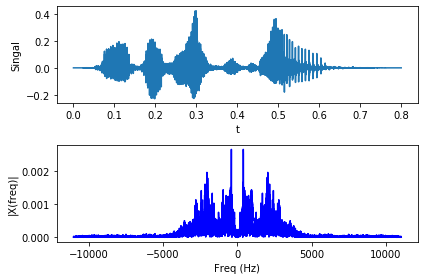

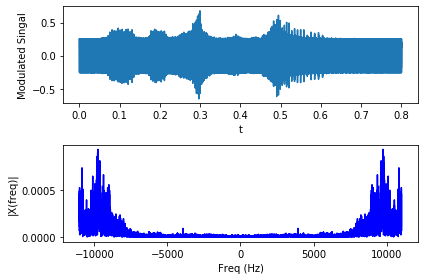

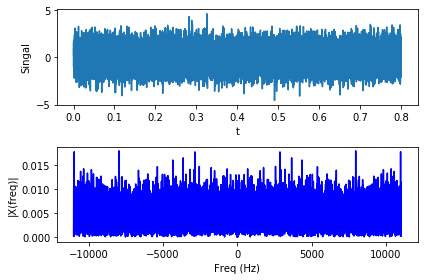

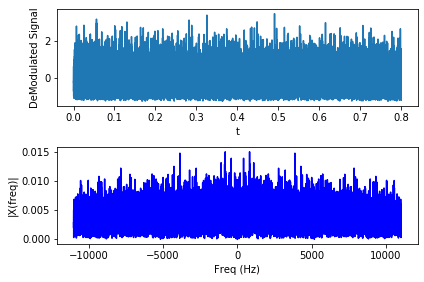

In [14]:
#Read The Image
audio_message, sr = sf.read('./maybe-next-time.wav')
audio_message = audio_message[:, 0] 

sd.play(audio_message, sr)
status = sd.wait()
time_freq_domain(sr, audio_message, "Singal")

#Modulation
MS = modulation(audio_message, sr) 

#Add Noise
noisy_modulated_signal = MS + np.random.normal(0, 1, MS.shape)

time_freq_domain(sr,noisy_modulated_signal , "Singal")
#Demodulation
DMS = demodulation(noisy_modulated_signal, sr) 

sd.play(DMS, sr)
status = sd.wait()

#Save File
wavfile.write('H.wav', sr , DMS)




